# Data preprocessing


In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skew
from scipy.stats import norm
from scipy.stats.stats import pearsonr
sns.set(style="white", color_codes=True)
sns.set_context(rc={"font.family":'sans',"font.size":24,"axes.titlesize":24,"axes.labelsize":24})  

import warnings 
warnings.filterwarnings("ignore")

%matplotlib inline

In [127]:
train = pd.read_csv('./dataset/train.csv')
test = pd.read_csv('./dataset/test.csv')
train.head()

,StoreID,Date,IsHoliday,IsOpen,HasPromotions,StoreType,AssortmentType,NearestCompetitor,Region,NumberOfCustomers,...,Mean_TemperatureC,Mean_VisibilityKm,Mean_Wind_SpeedKm_h,Min_Dew_PointC,Min_Humidity,Min_Sea_Level_PressurehPa,Min_TemperatureC,Min_VisibilitykM,Precipitationmm,WindDirDegrees
0,1000,01/03/2016,0,1,0,Hyper Market,General,326,7,495,...,1,11.0,16,-2,70,1029,1,6.0,0.0,23
1,1000,02/03/2016,0,1,0,Hyper Market,General,326,7,608,...,3,13.0,10,-2,58,1025,1,10.0,0.0,56
2,1000,04/03/2016,0,1,0,Hyper Market,General,326,7,665,...,3,11.0,10,-3,55,1023,2,8.0,0.0,22
3,1000,05/03/2016,0,1,0,Hyper Market,General,326,7,630,...,3,15.0,10,-6,25,1022,-1,10.0,0.0,108
4,1000,06/03/2016,0,0,0,Hyper Market,General,326,7,0,...,1,12.0,5,-6,48,1022,-5,5.0,0.0,46


In [129]:
test.head()

,StoreID,Date,IsHoliday,IsOpen,HasPromotions,StoreType,AssortmentType,NearestCompetitor,Region,Region_AreaKM2,...,Mean_TemperatureC,Mean_VisibilityKm,Mean_Wind_SpeedKm_h,Min_Dew_PointC,Min_Humidity,Min_Sea_Level_PressurehPa,Min_TemperatureC,Min_VisibilitykM,Precipitationmm,WindDirDegrees
0,1000,01/03/2018,0,1,0,Hyper Market,General,326,7,9643,...,6,14.0,5,-1,46,1011,2,10.0,0.00,180
1,1000,02/03/2018,0,1,0,Hyper Market,General,326,7,9643,...,4,12.0,6,-1,52,1009,3,10.0,5.08,315
2,1000,03/03/2018,0,1,0,Hyper Market,General,326,7,9643,...,3,13.0,11,-3,41,1013,-2,10.0,0.00,210
3,1000,04/03/2018,0,0,0,Hyper Market,General,326,7,9643,...,6,11.0,18,-2,65,1002,1,6.0,3.05,193
4,1000,05/03/2018,0,1,1,Hyper Market,General,326,7,9643,...,6,10.0,23,-5,25,1000,2,8.0,0.25,247


we notice that the in the test set the attributes 'NumberOfCustomers' and 'NumberOfSales' are missing, these 2 are infact our target.

We generate a data set containing all the data except the targets for preprocessing purposes.

In [130]:
test_attributes=['StoreID','Date','IsHoliday','IsOpen','HasPromotions','StoreType','AssortmentType','NearestCompetitor','Region','Region_AreaKM2','Region_GDP','Region_PopulationK','CloudCover','Events','Max_Dew_PointC','Max_Gust_SpeedKm_h','Max_Humidity','Max_Sea_Level_PressurehPa','Max_TemperatureC','Max_VisibilityKm','Max_Wind_SpeedKm_h','Mean_Dew_PointC','Mean_Humidity','Mean_Sea_Level_PressurehPa','Mean_TemperatureC','Mean_VisibilityKm','Mean_Wind_SpeedKm_h','Min_Dew_PointC','Min_Humidity','Min_Sea_Level_PressurehPa','Min_TemperatureC','Min_VisibilitykM','Precipitationmm','WindDirDegrees']
all_data = pd.concat((train.loc[:,test_attributes],
                      test.loc[:,test_attributes]))
all_data.head()

,StoreID,Date,IsHoliday,IsOpen,HasPromotions,StoreType,AssortmentType,NearestCompetitor,Region,Region_AreaKM2,...,Mean_TemperatureC,Mean_VisibilityKm,Mean_Wind_SpeedKm_h,Min_Dew_PointC,Min_Humidity,Min_Sea_Level_PressurehPa,Min_TemperatureC,Min_VisibilitykM,Precipitationmm,WindDirDegrees
0,1000,01/03/2016,0,1,0,Hyper Market,General,326,7,9643,...,1,11.0,16,-2,70,1029,1,6.0,0.0,23
1,1000,02/03/2016,0,1,0,Hyper Market,General,326,7,9643,...,3,13.0,10,-2,58,1025,1,10.0,0.0,56
2,1000,04/03/2016,0,1,0,Hyper Market,General,326,7,9643,...,3,11.0,10,-3,55,1023,2,8.0,0.0,22
3,1000,05/03/2016,0,1,0,Hyper Market,General,326,7,9643,...,3,15.0,10,-6,25,1022,-1,10.0,0.0,108
4,1000,06/03/2016,0,0,0,Hyper Market,General,326,7,9643,...,1,12.0,5,-6,48,1022,-5,5.0,0.0,46


### Exploration

First, we should explore the data. We start from the target variables NumberOfCustomers and NumberOfSales, the variable we need to predict. We check their distribution.

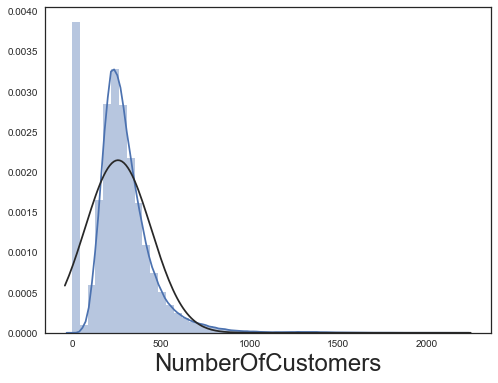

In [131]:
matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)
# fit the data with a normal distribution and 
sns.distplot(train['NumberOfCustomers'] , fit=norm)

The first thing we notice is the high frequency of '0' customers due to the fact that when the Store is closed there are no customers. So we delete all the instances in the train set where the Store is closed because they are useless for the training but in doing prediction we have to remember to predict '0' customers and '0' number of sales.

### Summary stats for numerical variables

In [132]:
train=train[train.IsOpen != 0]
train.head() #redo for trainset after imputation because we will use all_data

,StoreID,Date,IsHoliday,IsOpen,HasPromotions,StoreType,AssortmentType,NearestCompetitor,Region,NumberOfCustomers,...,Mean_TemperatureC,Mean_VisibilityKm,Mean_Wind_SpeedKm_h,Min_Dew_PointC,Min_Humidity,Min_Sea_Level_PressurehPa,Min_TemperatureC,Min_VisibilitykM,Precipitationmm,WindDirDegrees
0,1000,01/03/2016,0,1,0,Hyper Market,General,326,7,495,...,1,11.0,16,-2,70,1029,1,6.0,0.0,23
1,1000,02/03/2016,0,1,0,Hyper Market,General,326,7,608,...,3,13.0,10,-2,58,1025,1,10.0,0.0,56
2,1000,04/03/2016,0,1,0,Hyper Market,General,326,7,665,...,3,11.0,10,-3,55,1023,2,8.0,0.0,22
3,1000,05/03/2016,0,1,0,Hyper Market,General,326,7,630,...,3,15.0,10,-6,25,1022,-1,10.0,0.0,108
5,1000,07/03/2016,0,1,1,Hyper Market,General,326,7,763,...,4,22.0,11,-4,26,1016,-2,16.0,0.0,68


now we don't have anymore instances where the Store is closed. We visualize again the distribution of 'NumberOfCustomers'

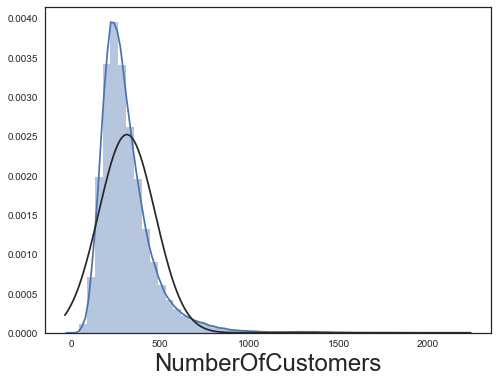

In [133]:
matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)
# fit the data with a normal distribution and 
sns.distplot(train['NumberOfCustomers'] , fit=norm)

We visualize also the distribution of 'NumberOfSales' considering that the instancies where the Store was closed are already been removed

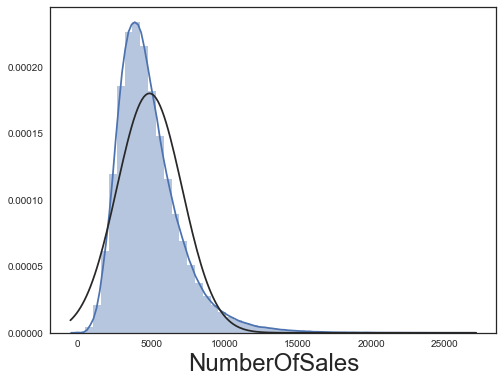

In [134]:
matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)
# fit the data with a normal distribution and 
sns.distplot(train['NumberOfSales'] , fit=norm)

## Missing Value

Let's check how many missing values are in the data set and how can we deal with them. 


In [135]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(10)

,Missing Ratio
Max_Gust_SpeedKm_h,78.139122
Events,24.711892
CloudCover,8.721317
Min_VisibilitykM,2.454502
Mean_VisibilityKm,2.454502
Max_VisibilityKm,2.454502


The attribute Max_Gust_SpeedKm_h has too many missing values... We have 2 possibility:
    1)supposing that the missing values mean no Gust and replace them with 0
    2)drop the column and do not take it into account for training

Let's consider the first option for the moment:


Let's see in the training set if there is any correlation between the number of Sales wrt 'Max_Gust_SpeedKm_h' when we impute the missing value with '0'

In [74]:
train['Max_Gust_SpeedKm_h'] = train['Max_Gust_SpeedKm_h'].fillna(0)

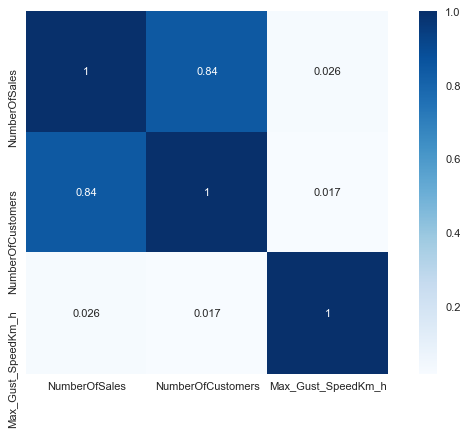

In [75]:
plt.rcParams['figure.figsize'] = [10.0,6.0]
plt.rcParams['figure.dpi']=80
covariance=train[['NumberOfSales','NumberOfCustomers','Max_Gust_SpeedKm_h']].corr(method='pearson')
sns.heatmap(covariance,square=True,annot=True,cmap="Blues")

'Max_Gust_SpeedKm_h seems to have no correlation with the targets.
Considering the fact that the 80% of the values are been imputed following the first option, the best option seems to be not consider that attribute for training.
Let's drop it.

In [138]:
all_data = all_data.drop(['Max_Gust_SpeedKm_h'], axis=1)
all_data.head()

,StoreID,Date,IsHoliday,IsOpen,HasPromotions,StoreType,AssortmentType,NearestCompetitor,Region,Region_AreaKM2,...,Mean_TemperatureC,Mean_VisibilityKm,Mean_Wind_SpeedKm_h,Min_Dew_PointC,Min_Humidity,Min_Sea_Level_PressurehPa,Min_TemperatureC,Min_VisibilitykM,Precipitationmm,WindDirDegrees
0,1000,01/03/2016,0,1,0,Hyper Market,General,326,7,9643,...,1,11.0,16,-2,70,1029,1,6.0,0.0,23
1,1000,02/03/2016,0,1,0,Hyper Market,General,326,7,9643,...,3,13.0,10,-2,58,1025,1,10.0,0.0,56
2,1000,04/03/2016,0,1,0,Hyper Market,General,326,7,9643,...,3,11.0,10,-3,55,1023,2,8.0,0.0,22
3,1000,05/03/2016,0,1,0,Hyper Market,General,326,7,9643,...,3,15.0,10,-6,25,1022,-1,10.0,0.0,108
4,1000,06/03/2016,0,0,0,Hyper Market,General,326,7,9643,...,1,12.0,5,-6,48,1022,-5,5.0,0.0,46


Now that Max_Gust_SpeedKm_h is gone let's continue with the imputation'.
The next attribute is 'Events' with a missing ratio of 24%.
If we analyze the Events we notice that values like 'sunny' never appear so the best option seems to assume that missing values mean no particulare forcasting events.
Let's fill them with the value 'none'.

In [139]:
all_data["Events"] = all_data["Events"].fillna("None")

Similarly, noticing that in CloudCover the values range from 1 to 9 but on the library is written that have a range 0-9 we assume that the missing values mean 0 level of covering

In [140]:
all_data["CloudCover"] = all_data["CloudCover"].fillna(0)

Now let's analyse Min_VisibilitykM, Mean_VisibilityKm and Max_VisibilityKm

In [141]:
Min_Visibility_missing=all_data[all_data.Min_VisibilitykM.isnull()]
Min_Visibility_missing.shape[0]

13959

In [142]:
#we compute the intersection between instances where Min_Visibilityand and Max_Visibility are missing
Max_Visibility_missing=all_data[all_data.Max_VisibilityKm.isnull()]
vis=Min_Visibility_missing.merge(Max_Visibility_missing)
vis.shape[0]

13959

In [143]:
#we intersect vis with the instances where Mean_Visibility is missing too
Mean_Visibility_missing=all_data[all_data.Mean_VisibilityKm.isnull()]
vis=vis.merge(Mean_Visibility_missing)
vis.shape[0]

13959

we notice that alla the dataframes have the same count. This means that when one of these 3 atributes is missing also the other ones are missing.
We try to understand if the missing triples focus on a particoular region/period/Store because, if that, we have to deal with them carefully to not indroduce bias in the dataset.

In [144]:
# plt.figure(figsize=(8, 6))
# sns.set_context("poster", font_scale=1.5, rc={"lines.linewidth": 2.5})
a = iter(list(range(7)))
for i in a:
   # vis_gb=vis.groupby(['Region']).count()
    vis_gb=vis[vis.Region == i]
    print('region %d, number of missing triples:' % i )
    print(vis_gb.shape[0])

region 0, number of missing triples:
715
region 1, number of missing triples:
576
region 2, number of missing triples:
5000
region 3, number of missing triples:
920
region 4, number of missing triples:
54
region 5, number of missing triples:
1275
region 6, number of missing triples:
1080


the missing triples do not focus on a single region, now we have to impute them.
To do so we can take the median of the region in that particoular day.

In [161]:
all_data["Mean_VisibilityKm"] = all_data.groupby(["Region", "Date"])["Mean_VisibilityKm"].transform(lambda x: x.fillna(x.median())).reset_index()



In [164]:
all_data["Max_VisibilityKm"] = all_data.groupby("Region")["Max_VisibilityKm"].transform(lambda x: x.fillna(x.median())).reset_index()

In [162]:
all_data["Min_VisibilitykM"] = all_data.groupby("Region")["Min_VisibilitykM"].transform(lambda x: x.fillna(x.median())).reset_index()



In [165]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(10)

,Missing Ratio


In [166]:
all_data.describe()

,StoreID,IsHoliday,IsOpen,HasPromotions,NearestCompetitor,Region,Region_AreaKM2,Region_GDP,Region_PopulationK,CloudCover,...,Mean_TemperatureC,Mean_VisibilityKm,Mean_Wind_SpeedKm_h,Min_Dew_PointC,Min_Humidity,Min_Sea_Level_PressurehPa,Min_TemperatureC,Min_VisibilitykM,Precipitationmm,WindDirDegrees
count,568710.000000,568710.000000,568710.000000,568710.000000,568710.000000,568710.000000,568710.000000,568710.000000,568710.000000,568710.000000,...,568710.000000,568710.000000,568710.000000,568710.000000,568710.000000,568710.000000,568710.000000,568710.000000,568710.000000,568710.000000
mean,1373.957616,0.029964,0.829147,0.380157,7999.119534,5.700586,12448.404758,14057.774367,3867.832217,5.075717,...,10.011000,242336.060955,11.784913,3.340256,50.406260,1012.401630,5.852888,242336.060955,0.780502,171.945909
std,216.381498,0.170489,0.376381,0.485426,11529.083651,3.358435,9197.663508,2753.553082,2814.035417,2.270052,...,6.883573,158704.391065,5.878919,5.895683,19.309611,8.925047,6.238434,158704.391065,2.551008,102.741075
min,1000.000000,0.000000,0.000000,0.000000,47.000000,0.000000,344.000000,9893.000000,816.000000,0.000000,...,-13.000000,0.000000,2.000000,-18.000000,8.000000,970.000000,-15.000000,0.000000,0.000000,-1.000000
25%,1187.000000,0.000000,1.000000,0.000000,1057.000000,3.000000,7215.000000,11849.000000,1293.000000,4.000000,...,4.000000,96488.250000,8.000000,-1.000000,35.000000,1007.000000,1.000000,96488.250000,0.000000,75.000000
50%,1373.000000,0.000000,1.000000,0.000000,3321.000000,6.000000,9643.000000,15017.000000,2770.000000,6.000000,...,10.000000,238665.500000,11.000000,3.000000,50.000000,1013.000000,6.000000,238665.500000,0.000000,194.000000
75%,1561.000000,0.000000,1.000000,1.000000,9673.000000,9.000000,15566.000000,15931.000000,5727.000000,7.000000,...,16.000000,380842.750000,14.000000,8.000000,65.000000,1018.000000,11.000000,380842.750000,0.250000,254.000000
max,1748.000000,1.000000,1.000000,1.000000,85070.000000,10.000000,32221.000000,23931.000000,8146.000000,8.000000,...,30.000000,523020.000000,53.000000,18.000000,100.000000,1038.000000,24.000000,523020.000000,58.930000,360.000000


now all the attributes of all_data (that includes train and test) have been imputed.
Before splitting it again in train and test set we should perform OHE and other possible prepocessing teqnique.